<a href="https://colab.research.google.com/github/Wanida-sth/BADS7105-CRM-Analytics/blob/main/Wongnai_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load libraries and data**

In [ ]:
!pip install --upgrade pythainlp
!pip install pyLDAvis

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

import pandas as pd
import numpy as np
import re
import string
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx


import pythainlp
from pythainlp.tokenize import sent_tokenize, word_tokenize
import gensim

# import tensorflow_hub as hub
# import tensorflow_text
# import tensorflow as tf

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font', family='TH Sarabun New', size=20, weight=400)

In [ ]:
df = pd.read_csv('Wongnai Reviews - Small.csv')

In [ ]:
df.tail()

,Review ID,Review
295,296,ค่ำนี้คุณเพื่อนอยากส้มตำ หมูเฮาเลยพากันลงมากิน...
296,297,ร้านสะอาดดี ตกแต่งสวยงาม มีที่จอดรถ ราคาเมนูต่...
297,298,เช้าๆ รีบๆ วิ่งมาเข่าห้องเรียนแทบไม่ทันแต่ต้อง...
298,299,ร้านนี้เป็นร้านกาแฟเล็กๆ ข้างๆ ร้านๆ Happy Man...
299,300,ทรูคอฟฟี่สาขาซีคอนอยู่ในศูนย์บริการของทรู ชั้น...


## **Tokenize Words**

In [ ]:
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ', '  ', '\n', 'ร้าน', '(', ')','ๆ','-','–','.',',','{','}',':',';','/','>','<','"']
screening_words = stopwords + removed_words

def tokenize_sentence(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine='newmm')
  for word in words:
    if word not in screening_words:
      if merged == '':
        merged = word
      else:
        merged = merged + ',' + word
  return merged

In [ ]:
df['Review_tokenized'] = df['Review'].apply(lambda x: tokenize_sentence(x))

In [ ]:
df.tail()

,Review ID,Review,Review_tokenized
295,296,ค่ำนี้คุณเพื่อนอยากส้มตำ หมูเฮาเลยพากันลงมากิน...,"ค่ำ,เพื่อน,ส้มตำ,หมู,เฮา,ลงมา,กิน,ส้มตำ,ออฟฟิศ..."
296,297,ร้านสะอาดดี ตกแต่งสวยงาม มีที่จอดรถ ราคาเมนูต่...,"สะอาด,ดี,ตกแต่ง,สวยงาม,ที่จอดรถ,ราคา,เมนู,เทีย..."
297,298,เช้าๆ รีบๆ วิ่งมาเข่าห้องเรียนแทบไม่ทันแต่ต้อง...,"เช้า,รีบ,วิ่ง,เข่า,ห้องเรียน,แทบ,ต้องหา,ของกิน..."
298,299,ร้านนี้เป็นร้านกาแฟเล็กๆ ข้างๆ ร้านๆ Happy Man...,"ร้านกาแฟ,Happy,Mango,อาทิตย์,นัด,เพื่อน,นั่ง,ค..."
299,300,ทรูคอฟฟี่สาขาซีคอนอยู่ในศูนย์บริการของทรู ชั้น...,"ทรู,คอ,ฟ,ฟี่,สาขา,ซีคอน,ศูนย์,บริการ,ทรู,ชั้น,..."


## **Create Dictionary**

In [ ]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)

In [ ]:
print(dictionary.token2id.keys())

dict_keys(['20', 'Macchiato', 'กาแฟ', 'กาแฟร้อน', 'กิน', 'คน', 'ครึ่ง', 'ความคิด', 'ชอบ', 'ดื่ม', 'ตอน', 'ทาน', 'นึง', 'บาท', 'ปริมาณ', 'มีความสุข', 'ลา', 'สั่ง', 'หนัก', 'หลังจากนี้', 'เข้าไป', 'เจอ', 'เดิน', 'เดิม', 'เป็นประจำ', 'เฟล', 'แก้ว', 'โบราณ', 'Art', 'Coffee', 'Kasetsart', '^^', 'of', 'คาราเมล', 'คิ', 'ชา', 'ซ', 'ซี', 'ดี', 'นั่ง', 'น่ารัก', 'บรรยากาศ', 'พนักงาน', 'พูดจา', 'มัค', 'รสชาติ', 'ราคา', 'ร้านกาแฟ', 'ลอน', 'ลาเต้', 'ลูกค้า', 'อัธยาศัย', 'อัสสัม', 'อา', 'อิตาเลียน', 'อุดหนุน', 'เพรส', 'เมนู', 'เยี่ยม', 'เอ๊กซ์', 'แพง', 'โซดา', 'โซ่', 'โต้', 'ไอ', 'ไอซ์', '555', 'กก', 'กรอบ', 'กระ', 'กระทะ', 'กร๊อบ', 'กลิ่น', 'กวง', 'กะ', 'กินน้ำ', 'กุ้ง', 'ก้น', 'ข้าวผัด', 'ข้าวเหนียว', 'ความสนใจ', 'คอ', 'คาว', 'งั้น', 'งี้', 'จริ๊ง', 'จัดจ้าน', 'จาน', 'จี๊ดจ๊าด', 'จ้น', 'จ้ิม', 'จ๊อบ', 'ฉ่า', 'ชิม', 'ชุ่มคอ', 'ดาว', 'ตบท้าย', 'ตัก', 'ถูกใจ', 'ทอด', 'ทะเล', 'ทีหลัง', 'นานา', 'นุ่ม', 'น้ำ', 'น้ำปลา', 'บรรยาย', 'ปลา', 'ปลาหมึก', 'ปาก', 'ปู', 'ปูม้า', 'ผสม', 'ผัด', 'พง', 'พริก', 'พลาด'

In [ ]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id], frequence) for id, frequence in couple] for couple in gensim_corpus]

In [ ]:
print(word_frequencies)

[[('20', 1), ('Macchiato', 2), ('กาแฟ', 1), ('กาแฟร้อน', 1), ('กิน', 1), ('คน', 1), ('ครึ่ง', 1), ('ความคิด', 1), ('ชอบ', 1), ('ดื่ม', 1), ('ตอน', 1), ('ทาน', 1), ('นึง', 1), ('บาท', 1), ('ปริมาณ', 1), ('มีความสุข', 1), ('ลา', 1), ('สั่ง', 1), ('หนัก', 1), ('หลังจากนี้', 1), ('เข้าไป', 1), ('เจอ', 1), ('เดิน', 1), ('เดิม', 1), ('เป็นประจำ', 1), ('เฟล', 2), ('แก้ว', 2), ('โบราณ', 1)], [('สั่ง', 1), ('Art', 1), ('Coffee', 1), ('Kasetsart', 1), ('^^', 1), ('of', 1), ('คาราเมล', 1), ('คิ', 1), ('ชา', 2), ('ซ', 1), ('ซี', 1), ('ดี', 1), ('นั่ง', 1), ('น่ารัก', 1), ('บรรยากาศ', 1), ('พนักงาน', 1), ('พูดจา', 1), ('มัค', 1), ('รสชาติ', 1), ('ราคา', 1), ('ร้านกาแฟ', 1), ('ลอน', 1), ('ลาเต้', 1), ('ลูกค้า', 1), ('อัธยาศัย', 1), ('อัสสัม', 1), ('อา', 1), ('อิตาเลียน', 1), ('อุดหนุน', 1), ('เพรส', 1), ('เมนู', 1), ('เยี่ยม', 1), ('เอ๊กซ์', 1), ('แพง', 1), ('โซดา', 1), ('โซ่', 1), ('โต้', 1), ('ไอ', 1), ('ไอซ์', 1)], [('กิน', 5), ('คน', 2), ('ชอบ', 1), ('ตอน', 1), ('ทาน', 3), ('นึง', 1), ('สั่ง', 3

## **Topic Modeling**

In [ ]:
num_topics = 10
chunksize = 4000 # size of the doc looked at every pass
passes = 20 # number of passes through documents
iterations = 50
eval_every = 1  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 7.86 s, sys: 64.2 ms, total: 7.92 s
Wall time: 7.95 s


In [ ]:
pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.000161  0.063639       1        1  27.959613
2      0.054313 -0.017450       2        1  14.159364
3     -0.056263 -0.022076       3        1  11.816670
4     -0.011405 -0.010256       4        1   9.054727
7     -0.013551  0.015401       5        1   8.779722
1      0.017166 -0.003775       6        1   7.565113
0      0.012460 -0.011705       7        1   7.068802
8     -0.002190 -0.008140       8        1   5.611743
9     -0.004937 -0.002764       9        1   4.605990
5      0.004567 -0.002875      10        1   3.378256, topic_info=       Term        Freq       Total Category  logprob  loglift
11      ทาน  395.000000  395.000000  Default  30.0000  30.0000
2      กาแฟ  293.000000  293.000000  Default  29.0000  29.0000
45   รสชาติ  389.000000  389.000000  Default  28.0000  28.0000
13      บาท  226.000000  226.000000  Default  27.0000  27.0000
57     เมนู  296.000000  296.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
607   เลือก    3.850466  124.943151  Topic10  -5.7149  -0.0919
207     ขาย    3.569016   96.719737  Topic10  -5.7908   0.0883
174   เนื้อ    3.875915  132.503372  Topic10  -5.7084  -0.1440
87      จาน    3.836902  181.300747  Topic10  -5.7185  -0.4677
434      นม    3.741307  144.181310  Topic10  -5.7437  -0.2638

[769 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
3684      1  0.818420                                                   
3654      6  0.568700                                                 !)
2469      1  0.581845                                                 "(
2469     10  0.193948                                                 "(
4229      4  0.524484                                                "พร
...     ...       ...                                                ...
1527      9  0.130349                                                  ”
4643      1  0.730821                                                  •
3141      9  0.665497  …................................................
2122      7  0.582107                                                  ′
2123      7  0.574917                                                  ″

[1497 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 5, 8, 2, 1, 9, 10, 6])

In [ ]:
model.show_topic(3)

[('อร่อย', 0.013324627),
 ('ทาน', 0.012598097),
 ('กิน', 0.009633795),
 ('ราคา', 0.008774263),
 ('รสชาติ', 0.008630936),
 ('จาน', 0.008628277),
 ('เมนู', 0.0079905195),
 ('สั่ง', 0.007644895),
 ('บาท', 0.006767633),
 ('อาหาร', 0.006563086)]

In [ ]:
result = []
topn = 15

for n in range(num_topics):
    temp_df = pd.DataFrame(model.get_topic_terms(n, topn=topn), columns=['word_id','prob'])
    temp_df['topic'] = n
    result.append(temp_df)

topic_terms_df = pd.concat(result)
topic_terms_df['word'] = topic_terms_df['word_id'].apply(lambda x: dictionary.get(x))
topic_terms_df.head()

,word_id,prob,topic,word
0,156,0.012269,0,อร่อย
1,11,0.011737,0,ทาน
2,2,0.011391,0,กาแฟ
3,57,0.009853,0,เมนู
4,45,0.009807,0,รสชาติ


In [ ]:
topic_terms_df['word'].unique()

array(['อร่อย', 'ทาน', 'กาแฟ', 'เมนู', 'รสชาติ', 'สั่ง', 'ดี', 'ราคา',
       'นั่ง', 'คน', 'นะคะ', 'ชา', 'บาท', 'กิน', 'ร้านกาแฟ', 'ชอบ',
       'เค้ก', 'หวาน', 'อาหาร', 'ลอง', 'จาน', 'เลือก', 'ผม', 'รส', 'นม',
       'ดู', 'บรรยากาศ'], dtype=object)

In [ ]:
topic_terms_df.to_pickle('topic_term.pkl')

In [ ]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [ ]:
df[df['topics'] == 3]

,Review ID,Review,Review_tokenized,topics,score
18,19,เคยทานทองม้วนสดมาหลายร้านแล้ว \nถ้าจะทานแบบอร่...,"ทาน,ทองม้วน,สด,ทาน,อร่อย,ใส่,มะพร้าวอ่อน,ตัอง,...",3,0.986715
20,21,เช้าๆบ่ายๆหรือเย็นๆ อาหารว่างที่คนเรามักหยิบจั...,"เช้า,บ่าย,เย็น,อาหารว่าง,คนเรา,หยิบ,กิน,ดื่ม,เ...",3,0.994940
36,37,ร้านตกแต่งน่ารักมาก สไตล์นั่งอยู่ในบ้านก็จะมีข...,"ตกแต่ง,น่ารัก,สไตล์,นั่ง,บ้าน,ของใช้,กระจุกกระ...",3,0.997681
69,70,ร้านเชฟมด รอบนี้มาจัดเป็นรอบที่สอง หลังจากถูกใ...,"เชฟ,มด,รอบ,รอบ,ที่สอง,ถูกใจ,รอบ,เ,เร,ก,โรงเรีย...",3,0.999527
81,82,เป็นร้านอาหารเช้า มีโจ๊กหมู หมี่ซั่ว เกาเหลาเล...,"อาหารเช้า,โจ๊ก,หมู,หมี่,ซั่ว,เกาเหลา,เลือดหมู,...",3,0.992360
86,87,ร้านขายเป็ดห่านพะโล้เก่าแก่ เขาเคลมว่าไม่มีสาข...,"ขาย,เป็ด,ห่าน,พะโล้,เก่าแก่,เคลม,สาขา,หาไม่,ตร...",3,0.998182
90,91,ร้าน A Little Sweet เป็นร้านของหวานสไตล์ desse...,"A,Little,Sweet,ของหวาน,สไตล์,dessert,ที่เกิด,ต...",3,0.512183
99,100,อุดรมีร้านขายอาหารเช้าหลายร้าน แต่ละร้านก็จะมี...,"อุดร,ขาย,อาหารเช้า,เมนู,คล้าย ๆ,หนี,ไท่,พ้น,ไข...",3,0.993625
122,123,Tea Story ร้านชานมไข่มุกกิ๊บเก๋ตั้งอยู่กลางห้า...,"Tea,Story,ชา,นม,ไข่มุก,กิ๊บเก๋,ตั้งอยู่,กลาง,ห...",3,0.998504
123,124,สวัสดีเพื่อนๆนักรีวิวร้านอาหาร ชาวWongnai.comท...,"สวัสดี,เพื่อน,รีวิว,ร้านอาหาร,Wongnai,com,Capt...",3,0.999254


In [ ]:
df.to_pickle('result.pkl')

## **Result**


In [ ]:
df = pd.read_pickle('result.pkl')
topic_terms_df = pd.read_pickle('topic_term.pkl')

In [ ]:
topic_terms_df.word.unique()

array(['อร่อย', 'ทาน', 'กาแฟ', 'เมนู', 'รสชาติ', 'สั่ง', 'ดี', 'ราคา',
       'นั่ง', 'คน', 'นะคะ', 'ชา', 'บาท', 'กิน', 'ร้านกาแฟ', 'ชอบ',
       'เค้ก', 'หวาน', 'อาหาร', 'ลอง', 'จาน', 'เลือก', 'ผม', 'รส', 'นม',
       'ดู', 'บรรยากาศ'], dtype=object)

In [ ]:
ttdf = topic_terms_df.sort_values(['topic','prob'],ascending=[True, False]).groupby('topic').head(10)
ttdf['word'].unique()

array(['อร่อย', 'ทาน', 'กาแฟ', 'เมนู', 'รสชาติ', 'สั่ง', 'ดี', 'ราคา',
       'นั่ง', 'คน', 'กิน', 'ชอบ', 'ชา', 'อาหาร', 'หวาน', 'จาน', 'บาท',
       'ผม'], dtype=object)

In [ ]:
import networkx as nx
G = nx.Graph()

G.add_weighted_edges_from([(f"Topic {r['topic']}", r['word'], round(r['prob'],4)) for i,r in ttdf.iterrows()])

print(nx.info(G))

Graph with 28 nodes and 100 edges


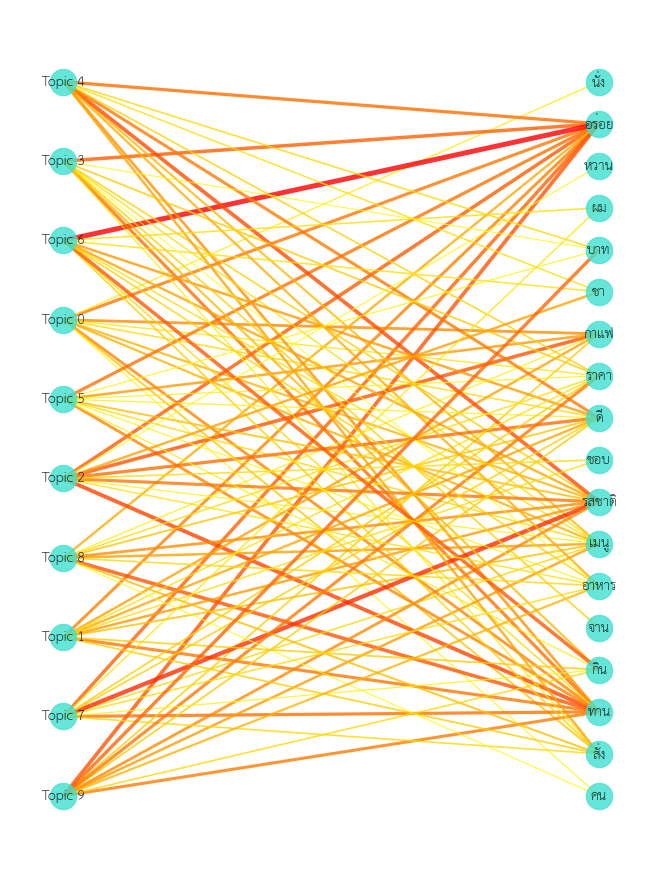

In [ ]:
# nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
# node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
topic_nodes = [ f"Topic {i}" for i in range(num_topics)]
edgelist, weights = zip(*[((u,v), d['weight']) for u,v,d in G.edges(data=True)])


width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights)))*4

labels_params = {'font_family': 'TH Sarabun New', 'alpha':.8, 'font_size':20}

plt.figure(figsize=(9,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
# pos = nx.spring_layout(G, k=5, weight='weight', iterations=80, seed=90, scale=2.5)
pos = nx.bipartite_layout(G, topic_nodes)
nx.draw(G, pos, with_labels=True, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        node_color='turquoise', node_size=700, 
        **labels_params)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

# plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()